## Red Wine Quality Dataset

There is 11 different attributs that decide the quality of red wine in this dataset.
- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol

We want to predict the quality of red wine depending on those attributes. The quality of red wine in this dataset is a number between 0 and 10.

## Requirements

In [74]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Collection & Data Preparation

In [2]:
df = pd.read_csv('data/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can treat this problem either as a classification problem or as a regression problem since red wine quality is nothing but a real number between 0 and 10. 

Here, I decided to treat it as a classification problem.

This dataset consists of only 6 types of quality values.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is any missing values in this dataset, we can directly go to the feature engineering part.

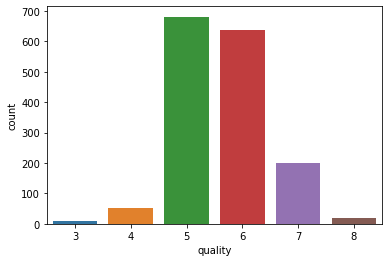

In [6]:
sns.countplot(x='quality', data=df)
plt.show()

We know that the quality of red wine is a value between 0 and 10. Here wa can see that there is either any 0, 1, 2 or 9, 10 values.
I will split these values into bad (0) or good (1) quality.

In [7]:
# working on the target: 0 for bad and 1 for good
df['quality'] = df['quality'].apply(lambda x: 0 if x in [3, 4, 5] else 1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [107]:
print(f"Proportion of red win of good quality in the target: {round(df['quality'][df['quality']==1].count()/len(df) * 100, 2)}%")

Proportion of red win of good quality in the target: 53.47%


## Feature Engineering

There is 1599 samples. We can either shuffle all the row of this dataset and then split it in training and testing sets by hand, or we can use scikit learn.

In [9]:
# frac=1 to shuffle the dataframe + reset the index
df_shuffle = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

Let's split the dataset as 70% for the training set and the rest for the testing set. I will only use scikit learn.

In [10]:
df_wo_target = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_wo_target, df['quality'], test_size=0.30)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
929,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
310,10.3,0.530,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3
1143,7.0,0.220,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0
50,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
...,...,...,...,...,...,...,...,...,...,...,...
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2
445,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56,10.1


Then we can scale the data to optimize the result

In [11]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df_wo_target.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=df_wo_target.columns)

To begin with, I will use a simple algorithm for this classification problem: decision trees.

## Fitting a first Model: Decision Trees

In [12]:
# initialize decision tree classifier class with a max_depth of 3
trees_3 = tree.DecisionTreeClassifier(max_depth=3)

# cols = df.loc[:, df.columns != 'quality'].columns.tolist()
cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

trees_3.fit(X_train[cols], y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy of this Model

In [13]:
# generating predictions on the training and testing sets
train_predict_3 = trees_3.predict(X_train[cols])
test_predict_3 = trees_3.predict(X_test[cols])

In [14]:
# calculating the accuracy of the predictions on the training and testing sets
train_acc_3 = metrics.accuracy_score(y_train, train_predict_3)
test_acc_3 = metrics.accuracy_score(y_test, test_predict_3)

train_acc_3, test_acc_3

(0.7515638963360143, 0.7125)

In [15]:
# Trying with max_depth=7
trees_8 = tree.DecisionTreeClassifier(max_depth=8)
trees_8.fit(X_train[cols], y_train)

train_predict_8 = trees_8.predict(X_train[cols])
test_predict_8 = trees_8.predict(X_test[cols])

train_acc_8 = metrics.accuracy_score(y_train, train_predict_8)
test_acc_8 = metrics.accuracy_score(y_test, test_predict_8)

train_acc_8, test_acc_8

(0.8811438784629133, 0.7166666666666667)

### Getting the best max_depth value

In [16]:
# storing accuracies for training and testing sets from 50% of accuracy
l_train_acc = [0.3]
l_test_acc = [0.3]

In [17]:
for d in range(1, 25):
    trees = tree.DecisionTreeClassifier(max_depth=d)
    trees.fit(X_train[cols], y_train)
    train_predict = trees.predict(X_train[cols])
    test_predict = trees.predict(X_test[cols])
    l_train_acc.append(metrics.accuracy_score(y_train, train_predict))
    l_test_acc.append(metrics.accuracy_score(y_test, test_predict))

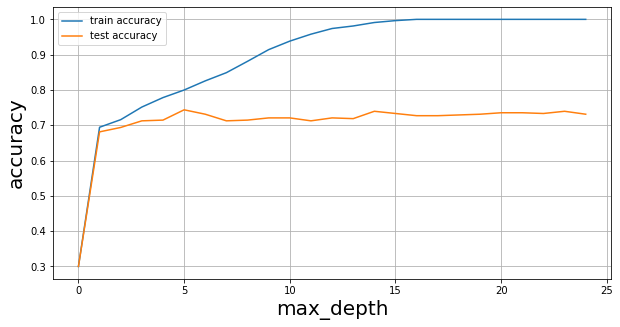

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(l_train_acc, label="train accuracy")
plt.plot(l_test_acc, label="test accuracy")
plt.legend(loc="upper left")
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.grid()
plt.show()

Here the best score is when the max_depth has a value of 9.
When we increase the max_depth value, the training accuracy keeps increasing until 100% but the testing accuracy remains the same or gets worse. We can conclude that the decision trees model implemented here keeps learning for the training set more we increase the max_depth value but the performance on the testing set does not improve.

=> overfitting

As we increase the max_depth value, we will get higher accuracies for the training set but will not provide similar result with real data.

## Fitting Several Machine Learning Models: Model Selection

### Models Used

In [81]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVM - Classifier': SVC(),
    'Stochastic Gradient Descent Classifier': SGDClassifier(),
    'Naïve Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [82]:
df_result = pd.DataFrame(index=list(models.keys()))
df_result

""
Logistic Regression
Linear Discriminant Analysis
Quadratic Discriminant Analysis
SVM - Classifier
Stochastic Gradient Descent Classifier
Naïve Bayes
Decision Trees
Bagging
AdaBoost
Random Forest


In [83]:
for f in tqdm(range(5, 16)):
    l_results = []
    for k, v in models.items():
        kfolds = KFold(n_splits=f)
        cross_validation = cross_val_score(v, X_train, y_train, cv=kfolds, scoring='accuracy')
        l_results.append(cross_validation.mean())
    df_result.loc[:, f'accuracy_kfold_{f}'] = l_results

df_result

100%|██████████| 11/11 [00:29<00:00,  2.72s/it]


,accuracy_kfold_5,accuracy_kfold_6,accuracy_kfold_7,accuracy_kfold_8,accuracy_kfold_9,accuracy_kfold_10,accuracy_kfold_11,accuracy_kfold_12,accuracy_kfold_13,accuracy_kfold_14,accuracy_kfold_15
Logistic Regression,0.739045,0.737211,0.739937,0.740840,0.739025,0.737275,0.734535,0.735482,0.737287,0.739048,0.734559
Linear Discriminant Analysis,0.748875,0.744370,0.742616,0.744418,0.740810,0.742632,0.736344,0.740849,0.740865,0.739953,0.740793
Quadratic Discriminant Analysis,0.716716,0.716659,0.721187,0.722989,0.715720,0.722112,0.722049,0.722985,0.719388,0.723926,0.723892
SVM - Classifier,0.760510,0.763168,0.756918,0.756950,0.755161,0.763216,0.763162,0.763269,0.765920,0.758748,0.764012
Stochastic Gradient Descent Classifier,0.672910,0.652296,0.682783,0.693512,0.672789,0.691659,0.716701,0.702356,0.677390,0.672028,0.704192
Naïve Bayes,0.726541,0.734518,0.730133,0.731032,0.730989,0.735505,0.724722,0.731917,0.732784,0.733714,0.732745
Decision Trees,0.714017,0.714024,0.748894,0.718525,0.741663,0.747144,0.723019,0.735501,0.732795,0.754238,0.757778
Bagging,0.771228,0.764969,0.773911,0.763200,0.776566,0.781065,0.773010,0.766758,0.781126,0.779306,0.768601
AdaBoost,0.720299,0.739913,0.723854,0.729220,0.742645,0.732794,0.725614,0.740858,0.718514,0.731894,0.737201
Random Forest,0.796232,0.795364,0.791779,0.797142,0.796258,0.801617,0.790906,0.788216,0.797185,0.805176,0.792589


In [86]:
df_result.sort_values(by='accuracy_kfold_14', ascending=False).index

Index(['Random Forest', 'Bagging', 'SVM - Classifier', 'Decision Trees',
       'Linear Discriminant Analysis', 'Logistic Regression', 'Naïve Bayes',
       'AdaBoost', 'Quadratic Discriminant Analysis', 'KNN',
       'Stochastic Gradient Descent Classifier'],
      dtype='object')

Here, we will implemented the best 5 models: Random Forest, Bagging, SVC, Decision Trees and LDA. We will try also to implement a XGBoost model.

## Prediction

In [91]:
def grid_search_models(model_fitted, params, kfolds):
    grid_search_model = GridSearchCV(model_fitted, param_grid=params, scoring='accuracy', cv=kfolds)
    grid_search_model.fit(X_train, y_train)
    return grid_search_model.best_params_

### SVM - Classifier

In [92]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_model_svc = model_svc.predict(X_test)
model_svc.score(X_test, y_test)

0.7520833333333333

In [103]:
params_svc = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
    'degree': [3, 8],
    # 'coef0': [0.01, 10, 0.5],
    'gamma' : ('auto', 'scale'),
}

d_best_params_svc = grid_search_models(model_svc, params_svc, 14)

In [104]:
model_svc = SVC(**d_best_params_svc)
model_svc.fit(X_train, y_train)
pred_model_svc = model_svc.predict(X_test)
model_svc.score(X_test, y_test)

0.7666666666666667

### LDA

In [105]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
pred_model_lda = model_lda.predict(X_test)
model_lda.score(X_test, y_test)

0.7416666666666667

In [106]:
params_lda = {
    'n_components': [10, 15, 20, 25, 30],
    'solver': ('lsqr','eigen')
}

d_best_params_lda = grid_search_models(model_lda, params_lda, 14)

ValueError: Invalid parameter learning_decay for estimator LinearDiscriminantAnalysis(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
model_lda = LinearDiscriminantAnalysis(**d_best_params_lda)
model_lda.fit(X_train, y_train)
pred_model_lda = model_lda.predict(X_test)
model_lda.score(X_test, y_test)

### Decision Trees

### Bagging

### Random Forest

### XGBoost

In [75]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred))

0.4054146372928193

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)